<a href="https://colab.research.google.com/github/TonyHamilton10/MyDataAnalyst/blob/main/machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning
### SVM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('C:/Users/user/Desktop/Machine Learning Full/Machine Learning Tutorial Part 1 _ 2/Cupcakes vs Muffins.csv')
data.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


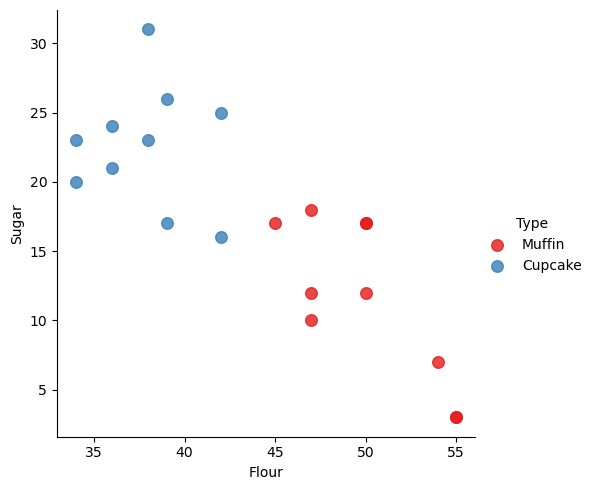

In [ ]:
sns.lmplot('Flour' , 'Sugar' , data=data , hue='Type' , palette='Set1' , fit_reg=False , scatter_kws={"s":70})

In [ ]:
type_label = np.where(data['Type']=='Muffin', 0 , 1)
data_features = data.columns.values[1:].tolist()
data_features
ingredients = data[['Flour' , 'Sugar']].values
print(ingredients)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [ ]:
from sklearn import svm

In [ ]:
model = svm.SVC(kernel = 'linear')
model.fit(ingredients , type_label)

SVC(kernel='linear')

In [ ]:
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30 , 60)
yy = a*xx - (model.intercept_[0]) / w[1]

b = model.support_vectors_[0]
yy_down = a* xx +(b[1]- a*b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


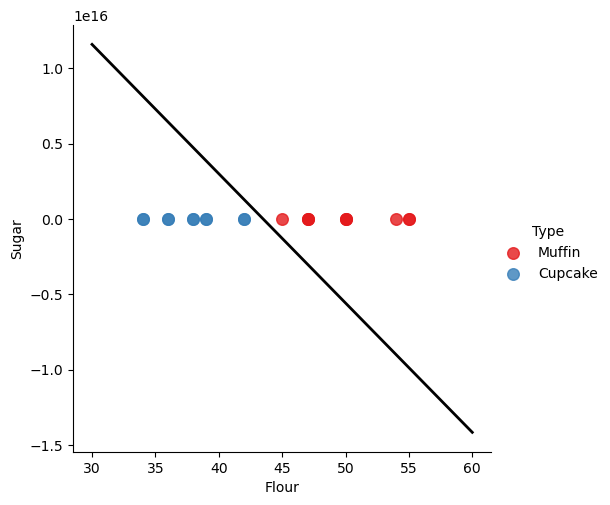

In [ ]:
sns.lmplot('Flour' , 'Sugar' , data=data , hue='Type' , palette='Set1' , fit_reg=False , scatter_kws={"s":70})
plt.plot(xx , yy , linewidth = 2 , color = 'black')

### K Means Clustering

In [ ]:
dataset = pd.read_csv('C:/Users/user/Desktop/Machine Learning Full/Machine Learning Tutorial Part 1 _ 2/Part 2/cars (dataset for k means).csv')

In [ ]:
dataset.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,Toyota
1,31.9,4,89,71,1925,14,1980,Honda
2,17.0,8,302,140,3449,11,1971,Toyota
3,15.0,8,400,150,3761,10,1971,Toyota
4,30.5,4,98,63,2051,17,1978,Toyota


In [ ]:
X = dataset.iloc[:, :-1]
X

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350,165,4209,12,1972
1,31.9,4,89,71,1925,14,1980
2,17.0,8,302,140,3449,11,1971
3,15.0,8,400,150,3761,10,1971
4,30.5,4,98,63,2051,17,1978
...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980
257,36.1,4,91,60,1800,16,1979
258,22.0,6,232,112,2835,15,1983
259,18.0,6,232,100,3288,16,1972


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [ ]:
from sklearn.cluster import KMeans

wcss = []

for i in range(0, 11):
    kmeans = KMeans(n_clusters=i , init='k-means++' , max_iter=300 , n_init=10 ,  random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans , inertia)
